# Data Preprocessing and Visualization
Importing required libraries...

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
Understanding the data, dealing with zeroes...

In [2]:
# Raw data as is...
uplink = pd.read_csv('./device_uplink.csv')
uplink = uplink.drop(['Unnamed: 0'], axis=1)
uplink

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
0,3087926,505,1970-01-01 00:00:00,20.0,4060,36,0,0
1,1829810,506,1970-01-01 00:00:00,19.0,5049,65,0,0
2,3085988,512,1970-01-01 00:00:00,19.0,2682,65,0,0
3,1827965,674,1970-01-01 00:00:00,20.0,2541,19,0,0
4,889419,544,1970-01-01 00:00:00,NaN,15244,86,0,0
...,...,...,...,...,...,...,...,...
324818,3771890,532,2021-03-11 16:04:20,10.0,2817,3,0,0
324819,3771892,532,2021-03-11 16:04:30,10.0,2826,2,0,0
324820,3771899,635,2021-03-11 16:05:18,2.0,6988,54,0,0
324821,3771901,504,2021-03-11 16:05:35,2.0,9687,89,0,0


In [3]:
# How many NaN values in each column?
uplink.isnull().sum()

uplink_id             0
owner_id              0
client_time           0
tag_id             1206
step                  0
battery_low           0
is_charge             0
tag_battery_low       0
dtype: int64

In [4]:
# We also notice we have 0 values which are invalid...
pd.unique(uplink['tag_id'])

array([20., 19., nan,  8.,  3.,  0., 10.,  4.,  5.,  9.,  1.,  2.,  7.,
        6., 11., 12.])

In [5]:
# Mark all NaN cases as zero
uplink.tag_id = uplink.tag_id.fillna(value=0)

# For now, we can just remove all invalid indexes
for n in (0, 18, 19, 20):
    uplink.drop(uplink.index[uplink['tag_id'] == n ], inplace = True)

pd.unique(uplink['tag_id'])

array([ 8.,  3., 10.,  4.,  5.,  9.,  1.,  2.,  7.,  6., 11., 12.])

In [6]:
# A few more things to fix...
uplink['client_time'] = pd.to_datetime(uplink['client_time'], format='%Y-%m-%d')
uplink.tag_id = uplink.tag_id.astype(np.int64)
uplink.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155573 entries, 55 to 324822
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   uplink_id        155573 non-null  int64         
 1   owner_id         155573 non-null  int64         
 2   client_time      155573 non-null  datetime64[ns]
 3   tag_id           155573 non-null  int64         
 4   step             155573 non-null  int64         
 5   battery_low      155573 non-null  int64         
 6   is_charge        155573 non-null  int64         
 7   tag_battery_low  155573 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 10.7 MB


In [7]:
uplink

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low
55,50782,230,2019-12-02 10:58:10,8,421,99,1,0
56,50795,230,2019-12-02 11:08:48,3,441,98,0,0
59,50802,230,2019-12-02 11:11:43,10,472,98,0,0
60,50810,230,2019-12-02 11:13:41,10,480,98,0,0
61,50812,230,2019-12-02 11:17:09,4,489,97,0,0
...,...,...,...,...,...,...,...,...
324818,3771890,532,2021-03-11 16:04:20,10,2817,3,0,0
324819,3771892,532,2021-03-11 16:04:30,10,2826,2,0,0
324820,3771899,635,2021-03-11 16:05:18,2,6988,54,0,0
324821,3771901,504,2021-03-11 16:05:35,2,9687,89,0,0


In [8]:
uplink['tag_id'].value_counts()

10    74711
2     29891
9     19256
1     12034
12     9002
11     2983
6      2690
3      2580
7      1875
4       223
8       207
5       121
Name: tag_id, dtype: int64

From here we can see that we don't have information for tags: 
- 13 (fitness equipment), 
- 14 (desk), 
- 15 (living room), 
- 16 (vacuum cleaner), 
- 17 (washer).

In [9]:
user = pd.read_csv('./user_information.csv')
user.head(5)

,id,birth year,age,sex,etc
0,519,1934,88,F,"혈압,당뇨,신장약 복용"
1,520,1934,88,F,NaN
2,580,1935,87,F,심장질환 고령자
3,495,1937,85,F,NaN
4,486,1937,85,F,"혈압, 관절염, 허리다침(우울증)"


In [10]:
user.sort_values(by=['age'])

,id,birth year,age,sex,etc
34,653,1954,68,F,고지혈증
33,664,1951,71,F,고지혈증
32,527,1950,72,F,NaN
31,230,1950,72,F,NaN
30,658,1949,73,F,"치매약, 무좀약"
29,661,1949,73,F,고지혈증
28,529,1949,73,F,"혈압, 당뇨 , 심장 스텐실\n담석 제거수술 하였음."
25,583,1948,74,F,무자녀
49,668,1948,74,M,"당뇨, 혈압"
27,644,1948,74,F,고지혈증


In [11]:
user.size

260

In [12]:
user.median()

id             545.5
birth year    1944.0
age             78.0
dtype: float64

# Visualization

In [13]:
palette = sns.color_palette("flare", 11)
youngest = uplink[uplink['owner_id'] == 653].reset_index(drop=True)
oldest = uplink[uplink['owner_id'] == 519].reset_index(drop=True)
median = uplink[uplink['owner_id'] == 586].reset_index(drop=True)

sample = uplink[uplink['owner_id'] == 582].reset_index(drop=True)


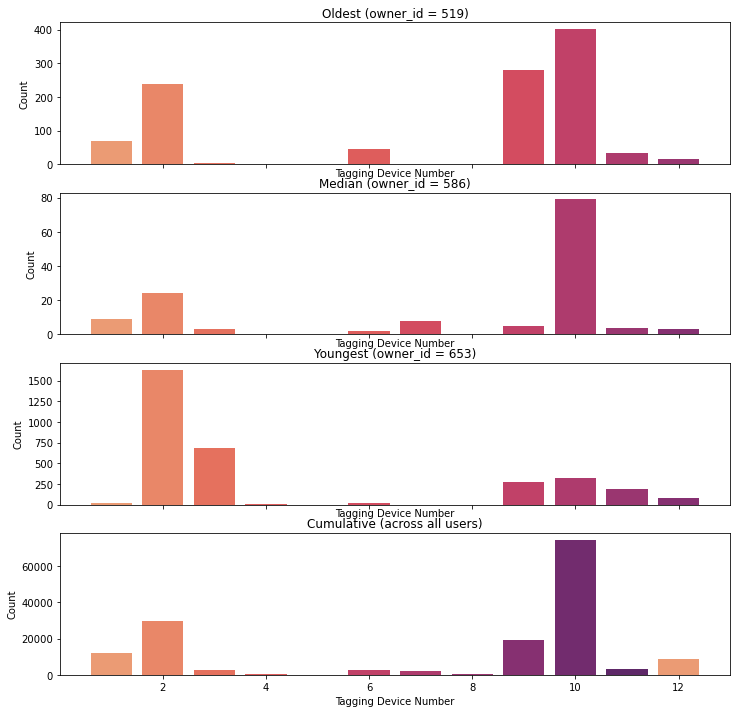

In [14]:
oldest_df = oldest[['client_time','tag_id']].groupby(['tag_id']).count()
median_df = median[['client_time','tag_id']].groupby(['tag_id']).count()
youngest_df = youngest[['client_time','tag_id']].groupby(['tag_id']).count()
cum_df = uplink[['client_time','tag_id']].groupby(['tag_id']).count()

oldest_x = oldest_df['client_time'].index
oldest_y = oldest_df['client_time'].values

median_x = median_df['client_time'].index
median_y = median_df['client_time'].values

youngest_x = youngest_df['client_time'].index
youngest_y = youngest_df['client_time'].values

cum_x = cum_df['client_time'].index
cum_y = cum_df['client_time'].values

fig, ax = plt.subplots(4,figsize=(12, 12))
ax[0].bar(oldest_x, oldest_y, color = palette)
ax[0].set_title("Oldest (owner_id = 519)")

ax[1].bar(median_x, median_y, color = palette)
ax[1].set_title("Median (owner_id = 586)")

ax[2].bar(youngest_x, youngest_y, color = palette)
ax[2].set_title("Youngest (owner_id = 653)")

ax[3].bar(cum_x, cum_y, color = palette)
ax[3].set_title("Cumulative (across all users)")

# Define labels
for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlabel("Tagging Device Number")
    ax.set_ylabel("Count")

# Display plot
plt.show()

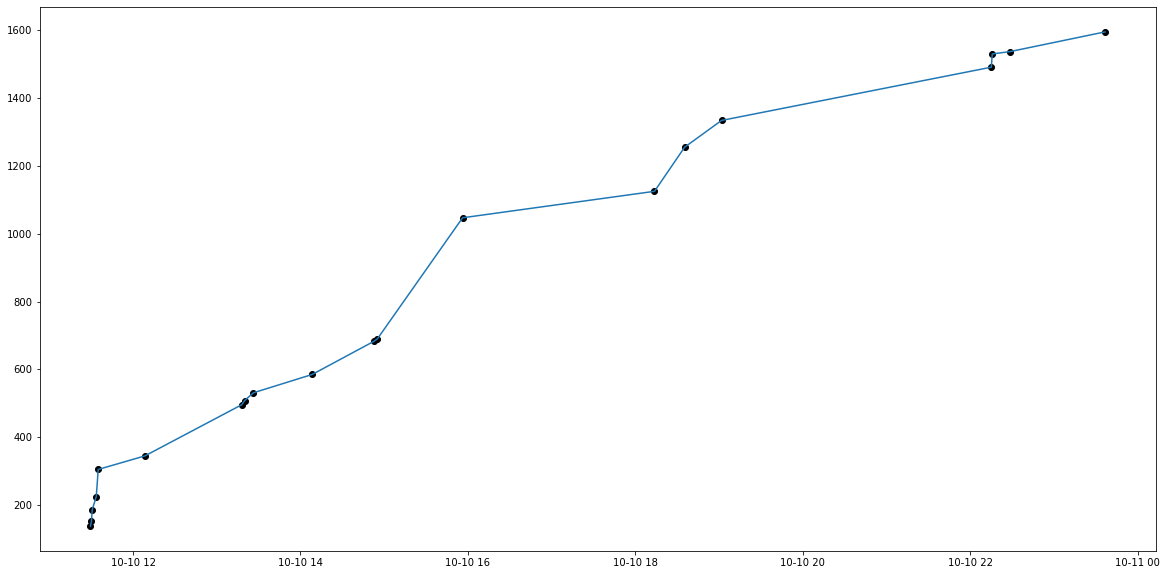

In [15]:
x = sample[['client_time','step']]

ts = pd.Timestamp
x = x.query('client_time > @ts("20201010")')
x = x.query('client_time < @ts("20201011")')

fig, ax = plt.subplots(1,figsize=(20, 10))
plt.plot(x['client_time'],x['step'])
plt.scatter(x['client_time'],x['step'],color='black')

plt.show()

In [16]:
# 1: refrigerator,       2: toilet,             3: bathroom, 
# 4: front door,         5: bedroom,            6: medicine, 
# 7: water purifier,     8: remote controller,  9: kitchen, 
# 10: microwave,         11: window,            12: sink.

# Actions are: 
# housework, hygiene, medication, hydration, outdoors recreation, indoors recreation, breakfast, lunch, dinner, nap, sleep, other

def action_inference (tag, time,  dataset):
    ts = pd.Timestamp
    action = 'Other'
    if((tag == 12) |  (tag == 11)):
        action = 'Housework'
        return action
    elif ((tag == 2) | (tag == 3)):
        action = 'Hygiene'
        return action
    elif ((tag == 6)):
        action = 'Medication'
        return action
    # elif ((tag == 8)):
    #     action = 'Indoors recreation'
    #     return action
    # elif ((tag == 7)):
    #     action = 'Hydration'
    #     return action
    # elif ((tag == 4)):
    #     action = 'Outdoors recreation'
    #     return action
    elif ((tag == 9)|(tag == 10)|(tag == 1)):
            if((ts(time).hour>=0) & (ts(time).hour<=10)):
                action = 'Breakfast'
                return action
            elif((ts(time).hour>=12) & (ts(time).hour<=15)):
                action = 'Lunch'
                return action
            elif((ts(time).hour>=19) & (ts(time).hour<=24)):
                action = 'Dinner'
                return action
    elif ((tag == 5)):
        if((ts(time).hour>=8) | (ts(time).hour<=20)):
            action = 'Nap'
            return action
        elif((ts(time).hour<8) | (ts(time).hour>20)):
            action = 'Sleep'
            return action
    else:
        return action

Recall:
- youngest `owner_id` is `653`
- median `owner_id` is `665`
- oldest `owner_id` is `519`

In [17]:
uplink_sample = uplink[uplink['owner_id'] == 665].reset_index(drop=True)
uplink_sample['pattern'] = ''
uplink_sample

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low,pattern
0,1183820,665,2020-09-23 15:19:03,10,140,27,0,0,
1,1184339,665,2020-09-23 15:46:19,6,147,27,0,0,
2,1184449,665,2020-09-23 15:51:27,2,167,27,0,0,
3,1184452,665,2020-09-23 15:51:33,2,174,27,0,0,
4,1184459,665,2020-09-23 15:52:17,2,190,27,0,0,
...,...,...,...,...,...,...,...,...,...
5681,3770980,665,2021-03-11 14:59:52,10,7326,35,0,0,
5682,3770982,665,2021-03-11 15:00:02,10,7337,36,0,0,
5683,3770984,665,2021-03-11 15:00:12,10,7350,36,0,0,
5684,3770989,665,2021-03-11 15:00:22,10,7371,35,0,0,


In [18]:
for i in range(len(uplink_sample)):
    uplink_sample['pattern'][i] = action_inference(uplink_sample['tag_id'][i],uplink_sample['client_time'][i],uplink_sample )

<ipython-input-18-538b1750c31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uplink_sample['pattern'][i] = action_inference(uplink_sample['tag_id'][i],uplink_sample['client_time'][i],uplink_sample )


In [19]:
uplink_sample

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low,pattern
0,1183820,665,2020-09-23 15:19:03,10,140,27,0,0,Lunch
1,1184339,665,2020-09-23 15:46:19,6,147,27,0,0,Medication
2,1184449,665,2020-09-23 15:51:27,2,167,27,0,0,Hygiene
3,1184452,665,2020-09-23 15:51:33,2,174,27,0,0,Hygiene
4,1184459,665,2020-09-23 15:52:17,2,190,27,0,0,Hygiene
...,...,...,...,...,...,...,...,...,...
5681,3770980,665,2021-03-11 14:59:52,10,7326,35,0,0,Lunch
5682,3770982,665,2021-03-11 15:00:02,10,7337,36,0,0,Lunch
5683,3770984,665,2021-03-11 15:00:12,10,7350,36,0,0,Lunch
5684,3770989,665,2021-03-11 15:00:22,10,7371,35,0,0,Lunch


In [20]:
df1 = pd.get_dummies(uplink_sample['pattern']).reset_index(drop=True)
df2 = uplink_sample.drop(['uplink_id','tag_id','pattern'], axis=1).reset_index(drop=True)
merge_df = pd.concat([df1, df2], axis=1)

In [21]:
merge_df = merge_df.groupby(pd.Grouper(key='client_time', axis=0, freq='D')).sum()
merge_df

,Breakfast,Dinner,Housework,Hygiene,Lunch,Medication,Nap,Other,owner_id,step,battery_low,is_charge,tag_battery_low
client_time,,,,,,,,,,,,,
2020-09-23,0,0,3,10,1,1,0,0,11305,6827,440,0,0
2020-09-24,13,0,2,6,12,1,0,0,29260,235169,100,0,0
2020-09-25,8,0,2,6,31,0,0,0,31255,324016,3672,0,0
2020-09-26,18,0,0,8,0,1,0,0,22610,175032,1367,0,0
2020-09-27,31,4,3,8,1,0,0,0,32585,183814,954,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-07,6,1,0,8,10,0,0,0,24605,276867,1694,0,8
2021-03-08,23,0,0,6,11,0,0,0,35910,154387,5108,0,0
2021-03-09,5,0,0,6,7,2,0,0,23275,242882,1458,0,0


In [22]:
merge_df = merge_df.drop(['owner_id'], axis=1).reset_index(drop=True)
merge_df

,Breakfast,Dinner,Housework,Hygiene,Lunch,Medication,Nap,Other,step,battery_low,is_charge,tag_battery_low
0,0,0,3,10,1,1,0,0,6827,440,0,0
1,13,0,2,6,12,1,0,0,235169,100,0,0
2,8,0,2,6,31,0,0,0,324016,3672,0,0
3,18,0,0,8,0,1,0,0,175032,1367,0,0
4,31,4,3,8,1,0,0,0,183814,954,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165,6,1,0,8,10,0,0,0,276867,1694,0,8
166,23,0,0,6,11,0,0,0,154387,5108,0,0
167,5,0,0,6,7,2,0,0,242882,1458,0,0
168,7,0,0,6,14,0,0,0,112027,2435,0,1


<AxesSubplot:>

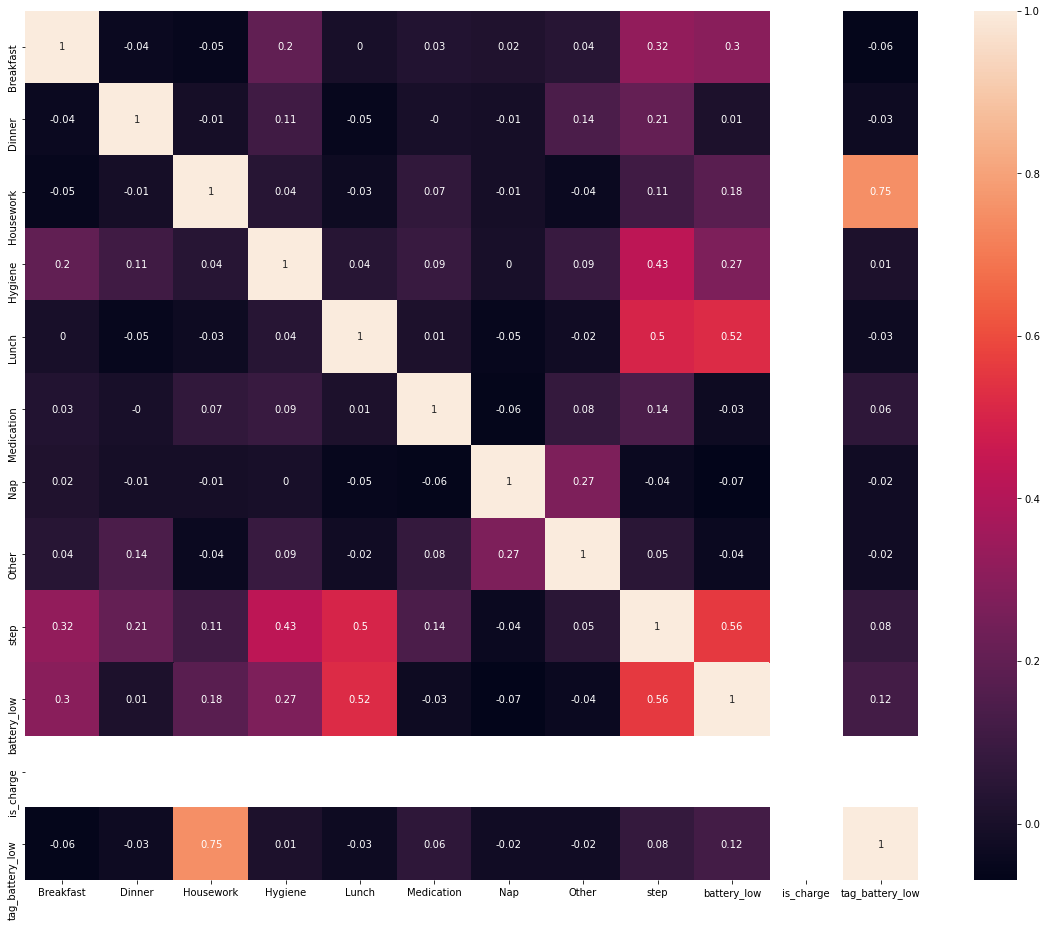

In [23]:
fig, ax = plt.subplots(figsize=(20,16))
corr_matrix = merge_df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

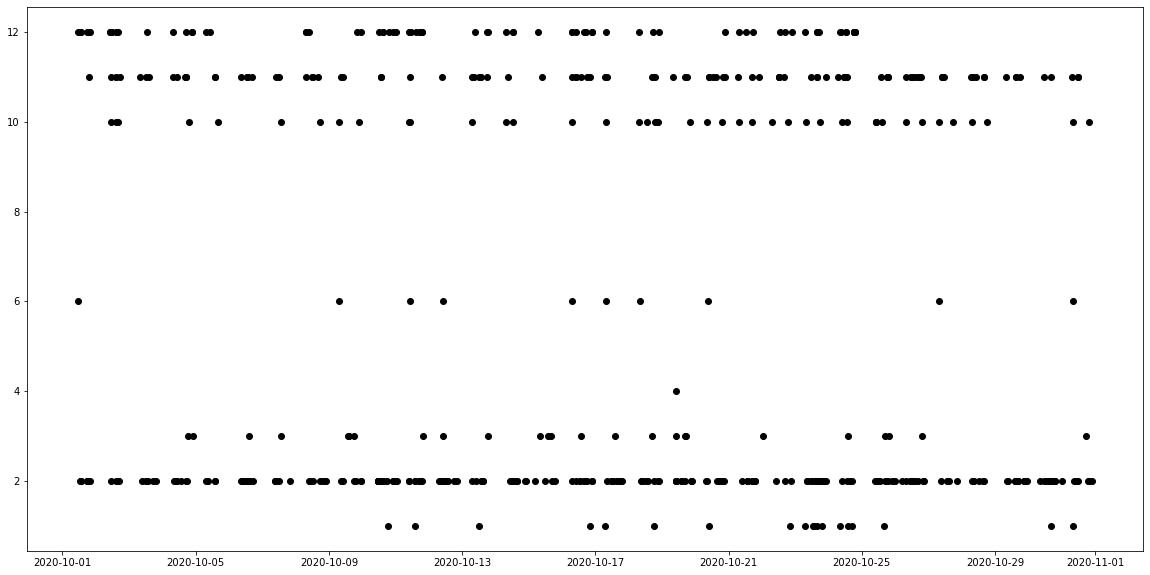

In [24]:
x = sample[['client_time', 'tag_id']]

ts = pd.Timestamp
x = x.query('client_time > @ts("20201001")')
x = x.query('client_time < @ts("20201101")')

fig, ax = plt.subplots(1, figsize=(20, 10))
plt.scatter(x['client_time'], x['tag_id'], color='black')

plt.show()

In [25]:
new = uplink.reset_index(drop=True)
user.rename(columns = {'id':'owner_id'}, inplace = True)
new = new.merge(user,on='owner_id',how='left')
new

,uplink_id,owner_id,client_time,tag_id,step,battery_low,is_charge,tag_battery_low,birth year,age,sex,etc
0,50782,230,2019-12-02 10:58:10,8,421,99,1,0,1950.0,72.0,F,NaN
1,50795,230,2019-12-02 11:08:48,3,441,98,0,0,1950.0,72.0,F,NaN
2,50802,230,2019-12-02 11:11:43,10,472,98,0,0,1950.0,72.0,F,NaN
3,50810,230,2019-12-02 11:13:41,10,480,98,0,0,1950.0,72.0,F,NaN
4,50812,230,2019-12-02 11:17:09,4,489,97,0,0,1950.0,72.0,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
155568,3771890,532,2021-03-11 16:04:20,10,2817,3,0,0,1938.0,84.0,F,NaN
155569,3771892,532,2021-03-11 16:04:30,10,2826,2,0,0,1938.0,84.0,F,NaN
155570,3771899,635,2021-03-11 16:05:18,2,6988,54,0,0,1944.0,78.0,F,"고혈압, 고지혈"
155571,3771901,504,2021-03-11 16:05:35,2,9687,89,0,0,1948.0,74.0,F,복약통에 설치 희망하심


In [26]:
df = new.drop(new.index[new['tag_id'] != 10])
df = df[['age','tag_id']].groupby(['age']).count()
df.rename(columns = {'tag_id':'microwave'}, inplace = True)
df

,microwave
age,
68.0,317
71.0,890
72.0,6018
73.0,1937
74.0,9960
75.0,4236
76.0,8108
77.0,3663
78.0,6697


<AxesSubplot:xlabel='age'>

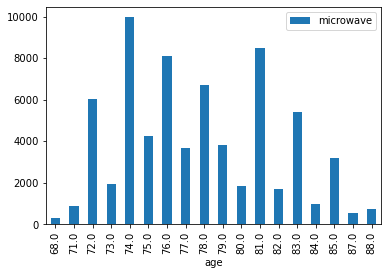

In [27]:
df.plot(kind='bar')